In [29]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from pathlib import Path

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
PATH2ROOT = Path('')
PATH2DATA = PATH2ROOT / 'data'
PATH2PARALLEL = PATH2DATA / 'parallel-kryvokhyzha'

In [32]:
scaling_filenames = [*filter(lambda x: 'Scaling' in x, os.listdir(PATH2PARALLEL))]
density_filenames = [*filter(lambda x: 'Density' in x, os.listdir(PATH2PARALLEL))]

In [33]:
def prepare_df(filenames, path):
    l = []
    for filename in filenames:
        ring = filename[:-4].split('Ring')[-1]
        t = pd.read_csv(path / filename)
        if 'Unnamed: 6' in t.columns:
            t = t.drop(columns=['Unnamed: 6'])
        assert t.shape[0] > 0
        
        t['ring'] = ring
        l.append(t)
    return pd.concat(l).reset_index(drop=True)

scaling_df = prepare_df(scaling_filenames, PATH2PARALLEL)
# density_df = prepare_df(density_filenames, PATH2PARALLEL)

In [35]:
# scaling_df = scaling_df.groupby(['count_of_ranks', 'density', 'size_of_matrix', 'ring'])[['time_elapsed']].mean().reset_index()
# scaling_df['time_elapsed'] = scaling_df['time_elapsed'].astype(np.int32)
scaling_df = scaling_df.sort_values(['count_of_ranks', 'density', 'size_of_matrix', 'ring'])
# density_df = density_df.groupby(['count_of_ranks', 'density', 'size_of_matrix', 'ring'])[['time_elapsed']].mean().reset_index()
# density_df['time_elapsed'] = density_df['time_elapsed'].astype(np.int32)

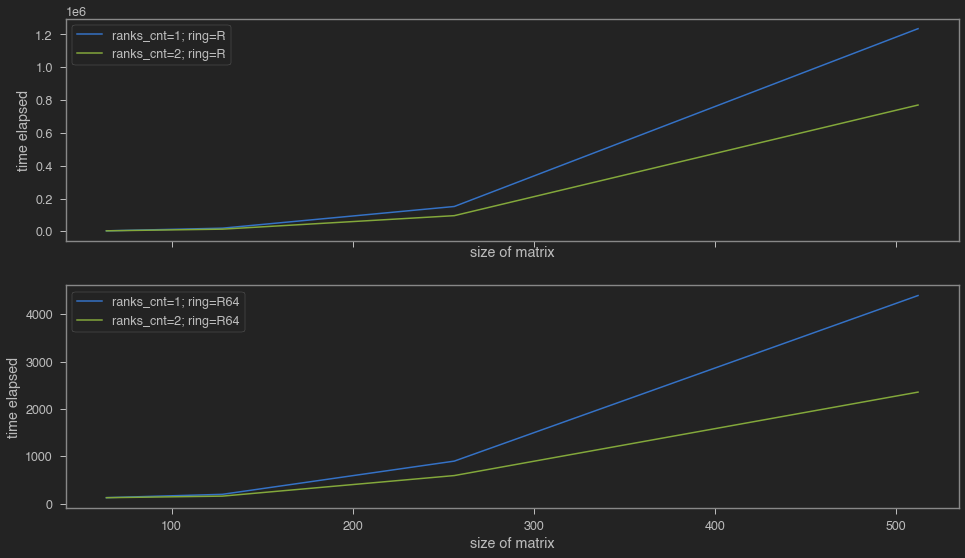

In [36]:
def plot_scaling(par_df, seq_df):
    unique_ranks = sorted(par_df['count_of_ranks'].unique())
    unique_rings = sorted(par_df['ring'].unique())

    _, axs = plt.subplots(len(unique_rings), 1, figsize=(16, 9), sharex=True,)
    for i, ring in enumerate(unique_rings):
        for ranks in unique_ranks:
            t1 = par_df[(par_df['count_of_ranks'] == ranks) & (par_df['ring'] == ring)].sort_values('size_of_matrix')
            axs[i].plot(t1['size_of_matrix'], t1['time_elapsed'], label=f'ranks_cnt={ranks}; ring={ring}',)
            
        if seq_df is not None:
            t2 = seq_df[(seq_df['ring'] == ring)].sort_values('size_of_matrix')
            axs[i].plot(t2['size_of_matrix'], t2['time_elapsed'], label=f'sequential; ring={ring}',)
            
    for i in range(len(unique_rings)):
        axs[i].set_xlabel('size of matrix')
        axs[i].set_ylabel('time elapsed')
        axs[i].legend()
    
plot_scaling(scaling_df, None)

In [37]:
def plot_density(par_df, seq_df):
    unique_ranks = sorted(par_df['count_of_ranks'].unique())
    unique_rings = sorted(par_df['ring'].unique())

    _, axs = plt.subplots(len(unique_rings), 1, figsize=(16, 9), sharex=True,)
    for i, ring in enumerate(unique_rings):
        for ranks in unique_ranks:
            t1 = par_df[(par_df['count_of_ranks'] == ranks) & (par_df['ring'] == ring)].sort_values('density')
            axs[i].plot(t1['density'], t1['time_elapsed'], label=f'ranks_cnt={ranks}; ring={ring}',)
        # t2 = seq_df[(seq_df['ring'] == ring)].sort_values('density')
        # axs[i].plot(t2['density'], t2['time_elapsed'], label=f'sequential; ring={ring}',)
            
    for i in range(len(unique_rings)):
        axs[i].set_xlabel('density')
        axs[i].set_ylabel('time elapsed')
        axs[i].legend()
    
# plot_density(density_df, None)

In [38]:
def plot_density(par_df, seq_df):
    unique_ranks = sorted(par_df['count_of_ranks'].unique())
    unique_rings = sorted(par_df['ring'].unique())

    _, axs = plt.subplots(len(unique_rings), 1, figsize=(16, 9), sharex=True,)
    for i, ring in enumerate(unique_rings):
        for ranks in unique_ranks:
            t1 = par_df[(par_df['count_of_ranks'] == ranks) & (par_df['ring'] == ring)].sort_values('size_of_matrix')
            axs[i].plot(t1['size_of_matrix'], t1['time_elapsed'], label=f'ranks_cnt={ranks}; ring={ring}',)
        t2 = seq_df[(seq_df['ring'] == ring)].sort_values('size_of_matrix')
        axs[i].plot(t2['size_of_matrix'], t2['time_elapsed'], label=f'sequential; ring={ring}',)
            
    for i in range(len(unique_rings)):
        axs[i].set_xlabel('size of matrix')
        axs[i].set_ylabel('time elapsed')
        axs[i].legend()

In [39]:
scaling_df['speedup'] = scaling_df['time_elapsed'].shift(8) / scaling_df['time_elapsed']

In [42]:
print('\t\tParallel algorithm, scaling tests, Ring = "R";')
display(scaling_df[scaling_df.ring == 'R'][['density', 'time_elapsed', 'count_of_ranks', 'size_of_matrix', 'ring', 'speedup']])

		Parallel algorithm, scaling tests, Ring = "R";


,density,time_elapsed,count_of_ranks,size_of_matrix,ring,speedup
12,100,3087,1,64,R,NaN
13,100,19281,1,128,R,NaN
14,100,151359,1,256,R,NaN
15,100,1234684,1,512,R,NaN
0,100,3194,2,64,R,0.966500
1,100,13331,2,128,R,1.446328
2,100,95475,2,256,R,1.585326
3,100,769536,2,512,R,1.604453


In [43]:
print('\t\tParallel algorithm, scaling tests, Ring = "R64";')
display(scaling_df[scaling_df.ring == 'R64'][['density', 'time_elapsed', 'count_of_ranks', 'size_of_matrix', 'ring', 'speedup']])

		Parallel algorithm, scaling tests, Ring = "R64";


,density,time_elapsed,count_of_ranks,size_of_matrix,ring,speedup
8,100,128,1,64,R64,NaN
9,100,198,1,128,R64,NaN
10,100,899,1,256,R64,NaN
11,100,4395,1,512,R64,NaN
4,100,127,2,64,R64,1.007874
5,100,160,2,128,R64,1.237500
6,100,594,2,256,R64,1.513468
7,100,2356,2,512,R64,1.865450


In [26]:
# print('\t\tParallel algorithm, density tests, Ring = "R";')
# display(density_df[density_df.ring == 'R'])

In [44]:
# print('\t\tParallel algorithm, density tests, Ring = "R64";')
# display(density_df[density_df.ring == 'R64'])